In [1]:
## generate.ipynb
## Code to generate a Gaussian Random Field for velocities as a standard model for cloud
## scale star formation simulations. The field is guaranteed to be solenoidal.

import numpy as np
import h5py
import matplotlib.pyplot as plt
from generate import init_velocity_field_proj

In [3]:
# Example usage
N = 128
sigma = 1.0
kspec = 2
kmin = 2
kmax = 16
# Lorentz's Birthday: 18th of July, 1853
seed = 18071853


(vx,vy,vz) = init_velocity_field_proj(sigma, kspec, kmin, kmax, N, seed=seed)

In [4]:
sigma_res = np.sqrt(np.std(vx)** 2 + np.std(vy)** 2 + np.std(vz)** 2)
np.std(vx), np.std(vy), np.std(vz)

(np.float64(0.5544481669782745),
 np.float64(0.5790182780786314),
 np.float64(0.5977667302429001))

The velocity field is meant to just encompass the whole cloud being considered. We show a slice of the x-component of the velocity field below with the edge of the cloud inscribed. When setting up the $\texttt{unicloud}^{\rm TM}$ initial conditions, one should set to zero all velocities which lie outside the cloud (outside the white circle below, but in 3D).

In [5]:
divv  = np.roll(vx, -1, axis = 0) -  np.roll(vx, 1, axis = 0)
divv += np.roll(vy, -1, axis = 1) -  np.roll(vy, 1, axis = 1)
divv += np.roll(vz, -1, axis = 2) -  np.roll(vz, 1, axis = 2)

In [6]:

k = np.fft.fftfreq(N, d=1.0 / N)
KS = np.meshgrid(k, k, k, indexing="ij")
(KX, KY, KZ) = KS
K = np.sqrt(KX**2 + KY**2 + KZ**2)

vx_k = np.fft.fftn(vx)
vy_k = np.fft.fftn(vy)
vz_k = np.fft.fftn(vz)

magv_k = np.abs(vx_k)**2 + np.abs(vy_k)**2 + np.abs(vz_k)**2

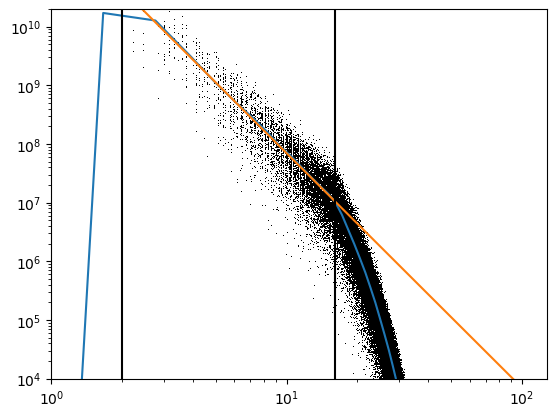

In [8]:
Kflat = K.flatten()
magv_k_flat = magv_k.flatten()

(hist_mag, bes) = np.histogram(Kflat, weights=magv_k_flat, bins=100)
(hist_n, bes) = np.histogram(Kflat, bins=100)
bcs = 0.5 * (bes[1:] + bes[:-1])

plt.plot(Kflat,magv_k_flat,'k,')
plt.plot(bcs, hist_mag/hist_n, label="k-space power spectrum")
plt.plot(bcs, 7e11*bcs**-4, label="k-space power spectrum")

plt.axvline(x=kmin,c="k")
plt.axvline(x=kmax,c="k")
plt.ylim(1e4,2e10)
plt.xlim(1,128)
plt.xscale("log")
plt.yscale("log")

0.006301807500461398


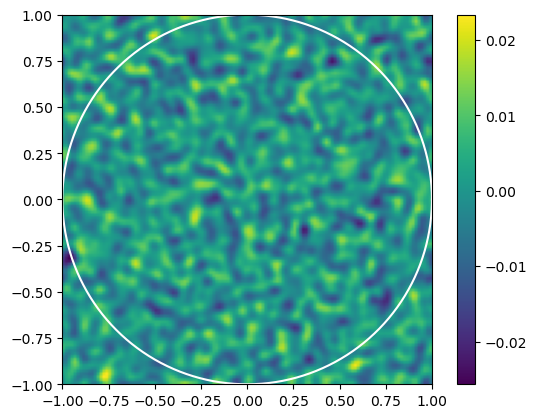

In [10]:
print(np.std(divv))
plt.imshow(vx[:,N//2],extent=(-1,1,-1,1))
plt.colorbar()

t = np.linspace(0,2*np.pi, 1000)
x = np.cos(t)
y = np.sin(t)
plt.plot(x,y,'w')